In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
url = 'https://raw.githubusercontent.com/TonyBMB/Python_course/refs/heads/main/Exercise%202.csv'
df = pd.read_csv(url)
df.head()

,time_h,Molecule_A1,Molecule_A2,Molecule_A3,Molecule_B1,Molecule_B_2,Molecule_B3
0,0,103.943936,115.448803,107.127328,90.607703,62.619445,92.503303
1,4,106.927459,129.384281,127.863836,101.489787,86.976959,86.580267
2,8,180.764015,153.835569,175.114521,115.193249,100.702744,100.817420
3,12,270.151550,258.685728,259.930339,123.615196,124.024084,147.005757
4,16,328.041422,352.923463,430.681180,178.102825,169.495632,170.918072


In [3]:
# Step 5 Tidy to long format and compute mean ± SEM per strain & time ===
time_col = df.columns[0]                       # first column (e.g., 'Hours')
value_cols = df.columns[1:]                    # replicate columns

long_df = df.melt(id_vars=[time_col],
                  value_vars=value_cols,
                  var_name='MoleculeRep',
                  value_name='Flurescence Intensity')


In [4]:
# Create a mapping from MoleculeRep to Molecule
molecule_map = {
    'Molecule_A1': 'Molecule A', 'Molecule_A2': 'Molecule A', 'Molecule_A3': 'Molecule A',
    'Molecule_B1': 'Molecule B', 'Molecule_B_2': 'Molecule B', 'Molecule_B3': 'Molecule B'
}

# Map the MoleculeRep column to the new Molecule column
long_df['Molecule'] = long_df['MoleculeRep'].map(molecule_map)


# mean, STD, and SEM for each time × Molecule
summary = (long_df
           .groupby([time_col, 'Molecule'], as_index=False)
           .agg(mean=('Flurescence Intensity', 'mean'),
                std=('Flurescence Intensity', lambda x: x.std(ddof=1)),
                sem=('Flurescence Intensity', lambda x: x.std(ddof=1) / np.sqrt(len(x))))) # Added SEM calculation

print("Summary (first rows):\n", summary.head(), "\n")

Summary (first rows):
    time_h    Molecule        mean        std       sem
0       0  Molecule A  108.840022   5.940580  3.429795
1       0  Molecule B   81.910151  16.733105  9.660863
2       4  Molecule A  121.391859  12.549585  7.245506
3       4  Molecule B   91.682338   8.495816  4.905062
4       8  Molecule A  169.904702  14.200069  8.198414 



In [5]:
unique_times = long_df['time_h'].unique()
print(unique_times)

[ 0  4  8 12 16 20 24 28 32 36 40 44 48]


In [6]:
ttest_results = []
for time_h in unique_times:
    # Subsequent steps will be performed inside this loop
    pass # Placeholder for the next steps

In [7]:
for time_h in unique_times:
    df_time = long_df[long_df['time_h'] == time_h]
    # Subsequent steps will be performed inside this loop
    pass # Placeholder for the next steps

In [8]:
for time_h in unique_times:
    df_time = long_df[long_df['time_h'] == time_h]
    molecule_a_intensity = df_time[df_time['Molecule'] == 'Molecule A']['Flurescence Intensity']
    molecule_b_intensity = df_time[df_time['Molecule'] == 'Molecule B']['Flurescence Intensity']
    # Subsequent steps will be performed inside this loop
    pass # Placeholder for the next steps

In [9]:
ttest_results = []
for time_h in unique_times:
    df_time = long_df[long_df['time_h'] == time_h]
    molecule_a_intensity = df_time[df_time['Molecule'] == 'Molecule A']['Flurescence Intensity']
    molecule_b_intensity = df_time[df_time['Molecule'] == 'Molecule B']['Flurescence Intensity']

    t_statistic, p_value = stats.ttest_ind(molecule_a_intensity, molecule_b_intensity)

    ttest_results.append({
        'time': time_h,
        't_statistic': t_statistic,
        'p_value': p_value
    })

In [10]:
raw_p_values = [result['p_value'] for result in ttest_results]
reject, p_values_adjusted, _, _ = multipletests(raw_p_values, method='fdr_bh')
for i, result in enumerate(ttest_results):
    result['p_value_adjusted'] = p_values_adjusted[i]
print("T-test results with adjusted p-values:")
for result in ttest_results:
    print(result)

T-test results with adjusted p-values:
{'time': np.int64(0), 't_statistic': np.float64(2.6268887040542555), 'p_value': np.float64(0.05837618900471896), 'p_value_adjusted': np.float64(0.05837618900471896)}
{'time': np.int64(4), 't_statistic': np.float64(3.3954960969972574), 'p_value': np.float64(0.02739078601509107), 'p_value_adjusted': np.float64(0.02967335151634866)}
{'time': np.int64(8), 't_statistic': np.float64(6.767780663855431), 'p_value': np.float64(0.002486893800859657), 'p_value_adjusted': np.float64(0.0032329619411175536)}
{'time': np.int64(12), 't_statistic': np.float64(15.382450107895789), 'p_value': np.float64(0.00010421042090650941), 'p_value_adjusted': np.float64(0.00022578924529743704)}
{'time': np.int64(16), 't_statistic': np.float64(6.3722088197329185), 'p_value': np.float64(0.003110648612677996), 'p_value_adjusted': np.float64(0.0036762210877103593)}
{'time': np.int64(20), 't_statistic': np.float64(11.377062780369991), 'p_value': np.float64(0.00034039801637129224), '

In [11]:
for result in ttest_results:
    print(f"Time: {result['time']} h, T-statistic: {result['t_statistic']:.4f}, Raw P-value: {result['p_value']:.4f}, Adjusted P-value: {result['p_value_adjusted']:.4f}")

Time: 0 h, T-statistic: 2.6269, Raw P-value: 0.0584, Adjusted P-value: 0.0584
Time: 4 h, T-statistic: 3.3955, Raw P-value: 0.0274, Adjusted P-value: 0.0297
Time: 8 h, T-statistic: 6.7678, Raw P-value: 0.0025, Adjusted P-value: 0.0032
Time: 12 h, T-statistic: 15.3825, Raw P-value: 0.0001, Adjusted P-value: 0.0002
Time: 16 h, T-statistic: 6.3722, Raw P-value: 0.0031, Adjusted P-value: 0.0037
Time: 20 h, T-statistic: 11.3771, Raw P-value: 0.0003, Adjusted P-value: 0.0005
Time: 24 h, T-statistic: 31.9186, Raw P-value: 0.0000, Adjusted P-value: 0.0001
Time: 28 h, T-statistic: 20.6642, Raw P-value: 0.0000, Adjusted P-value: 0.0001
Time: 32 h, T-statistic: 15.4583, Raw P-value: 0.0001, Adjusted P-value: 0.0002
Time: 36 h, T-statistic: 12.1756, Raw P-value: 0.0003, Adjusted P-value: 0.0004
Time: 40 h, T-statistic: 21.2628, Raw P-value: 0.0000, Adjusted P-value: 0.0001
Time: 44 h, T-statistic: 13.5482, Raw P-value: 0.0002, Adjusted P-value: 0.0003
Time: 48 h, T-statistic: 22.9356, Raw P-value: 

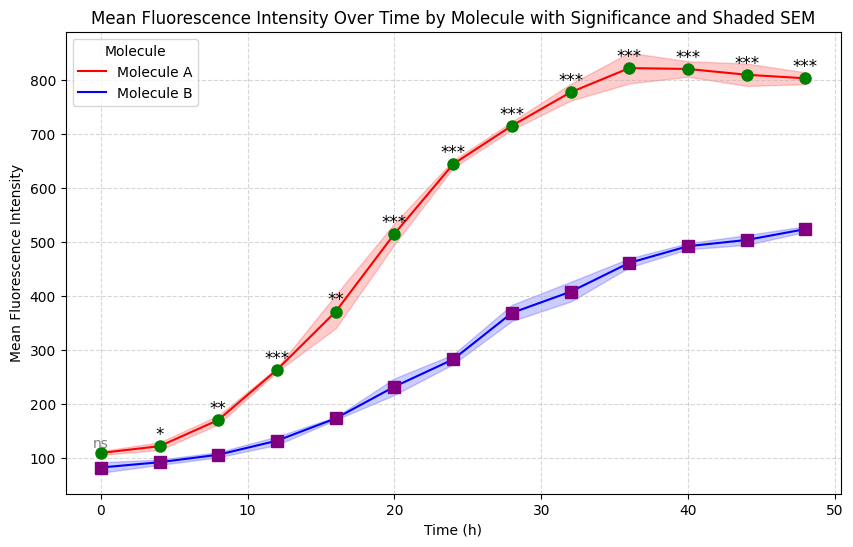

In [12]:
# Step 6: Plot the mean ± SEM per strain & time
plt.figure(figsize=(10, 6))

# Define custom markers for each molecule
molecule_markers = {'Molecule A': 'o', 'Molecule B': 's'}
# Define custom colors for lines and shaded regions
Color = {'Molecule A': 'red', 'Molecule B': 'blue'} # Using one color scheme for lines and shaded regions
# Define custom colors for markers
Marker_Color = {'Molecule A': 'green', 'Molecule B': 'purple'} # Example different colors for markers


sns.lineplot(data=summary, x=time_col, y='mean', hue='Molecule', style='Molecule', markers=False, dashes=False, palette=Color) # Set markers=False in lineplot and use Color for lines

# Plot shaded regions for standard error of the mean (SEM)
for molecule, color in Color.items():
    molecule_data = summary[summary['Molecule'] == molecule]
    plt.fill_between(molecule_data[time_col],
                     molecule_data['mean'] - molecule_data['sem'], # Use 'sem' for shaded region
                     molecule_data['mean'] + molecule_data['sem'], # Use 'sem' for shaded region
                     color=color, alpha=0.2) # Add shaded region with transparency

# Plot markers with different colors for each molecule
for molecule, color in Marker_Color.items(): # Use Marker_Color for markers
    molecule_data = summary[summary['Molecule'] == molecule]
    marker_style = molecule_markers[molecule]
    plt.plot(molecule_data[time_col], molecule_data['mean'], marker=marker_style, linestyle='None', color=color, markersize=8)

# Add significance indicators to the plot
for result in ttest_results:
    # Find the mean fluorescence intensity for Molecule A and B at this time point
    mean_a = summary[(summary['time_h'] == result['time']) & (summary['Molecule'] == 'Molecule A')]['mean'].iloc[0]
    mean_b = summary[(summary['time_h'] == result['time']) & (summary['Molecule'] == 'Molecule B')]['mean'].iloc[0]
    # Position the significance label above the higher of the two means
    y_position = max(mean_a, mean_b) + 5 # Add a small offset above the higher mean


    if result['p_value_adjusted'] < 0.05:
        # Determine the significance level and corresponding symbol
        if result['p_value_adjusted'] < 0.001:
            sig_symbol = '***'
        elif result['p_value_adjusted'] < 0.01:
            sig_symbol = '**'
        else:
            sig_symbol = '*'
        plt.text(result['time'], y_position, sig_symbol, ha='center', va='bottom', color='black', fontsize=12)
    else:
        # Add "ns" for non-significant
        plt.text(result['time'], y_position, 'ns', ha='center', va='bottom', color='gray', fontsize=10)


plt.xlabel('Time (h)')
plt.ylabel('Mean Fluorescence Intensity')
plt.title('Mean Fluorescence Intensity Over Time by Molecule with Significance and Shaded SEM') # Updated title
plt.grid(True,linestyle='--', alpha=0.5)
plt.show()

In [ ]:
#Comments: Fluorescent intensity of molecule B was higher compared to molecule A over the time period. In fact, the intensity of molecule B was significantly higher than molecules A in each of the time periods mentioned except 0h time point.